# El tratamiento de las variables categóricas

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")

In [6]:
df.head()
# Transaccion, Edad, Items que ha comprado, Ingresos mensuales, Tiempo de trx, Record, Sexo, Tipo economico, Gasto total

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


### Queremos predecir los gastos de un mes en particular en funcion si es hombre, mujer y dependiendo del sector economico

In [7]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City")

In [8]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [9]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [10]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [11]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [12]:
df_new = df_new[column_names].join(dummy_city_tier)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [13]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Female"
                , "Gender_Male", "City_Tier 1", "City_Tier 2", "City_Tier 3"
               , "Record"]

In [14]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [15]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print(lm.intercept_)
print(lm.coef_)

-79.4171303013718
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [17]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.1475389804920574),
 ('Transaction Time', 0.15494612549589393),
 ('Gender_Female', -131.02501325554675),
 ('Gender_Male', 131.02501325554664),
 ('City_Tier 1', 76.764326010495),
 ('City_Tier 2', 55.13897430923278),
 ('City_Tier 3', -131.90330031972783),
 ('Record', 772.2334457445645)]

In [18]:
lm.score(X,Y)

0.9179923586131016

El modelo puede ser escrito como:
    Total_Spend = -79.41713030137089 + 'Monthly Income' * 0.14753898049205746 + 'Transaction Time' * 0.1549461254958966 + 'Gender_Female' * -131.02501325554562 + 'Gender_Male' * 131.0250132555456 + 'City_Tier 1' * 76.76432601049542 + 'City_Tier 2' * 55.138974309232275 + 'City_Tier 3' * -131.90330031972783 + 'Record' * 772.2334457445639

In [19]:
df_new["prediction"] = lm.predict(df_new[feature_cols])
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [20]:
SSD = sum((df_new["prediction"]-df_new["Total Spend"])**2)
RSE = np.sqrt(SSD/len(df_new)-len(feature_cols)-1)
df_mean = np.mean(df_new["Total Spend"])
error = RSE/df_mean
print("Error del modelo: " + str(round(error*100,2)) + "%")

Error del modelo: 13.01%


## Eliminar variables dummy

In [21]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender").iloc[:,:1]
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City").iloc[:,0:2]
dummy_city_tier.head()

,City_Tier 1,City_Tier 2
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1


In [22]:
df_new = df.join(dummy_gender)
df_new = df_new.join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,City_Tier 1,City_Tier 2
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,1
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,1


In [23]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Female", "City_Tier 1", "City_Tier 2", "Record"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression().fit(X,Y)

In [24]:
df_new["Predict"] = lm.predict(df_new[feature_cols])

In [25]:
SSD = sum((df_new["Predict"]-df_new["Total Spend"])**2)
RSE = np.sqrt(SSD/len(df_new)-len(feature_cols)-1)
spend_mean = np.mean(df_new["Total Spend"])
error = RSE/spend_mean
print("Error del modelo: " + str(round(error*100,2)) + "%")

Error del modelo: 13.01%


In [26]:
print("El modelo explica en un " + str(round(lm.score(X,Y)*100,2)) + "% a la variable real")

El modelo explica en un 91.8% a la variable real


## Transformación de variables para conseguir una relación no lineal

In [27]:
import matplotlib.pyplot as plt
df_cars = pd.read_csv("../datasets/auto/auto-mpg.csv")
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


Text(0, 0.5, 'Consumo (millas por galeon)')

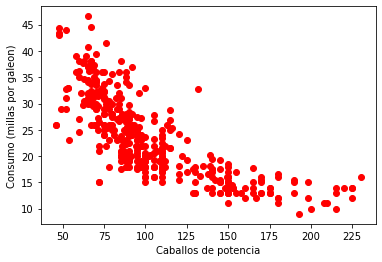

In [28]:
%matplotlib inline
df_cars["mpg"] = df_cars["mpg"].dropna()
df_cars["horsepower"] = df_cars["horsepower"].dropna()

plt.plot(df_cars["horsepower"], df_cars["mpg"], "ro")
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo (millas por galeon)")

## Modelo de regresión lineal
* mpg = a + b * horsepower

In [29]:
X = df_cars["horsepower"].fillna(df_cars["horsepower"].mean())
X = pd.DataFrame(X)
Y = df_cars["mpg"].fillna(df_cars["mpg"].mean())

In [30]:
lm_car = LinearRegression().fit(X,Y)

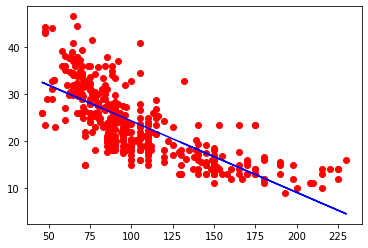

In [31]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X, lm_car.predict(X), "blue")

In [32]:
print("El modelo explica en un " + str(round(lm_car.score(X,Y)*100,2)) + "% a la variable real")

El modelo explica en un 57.47% a la variable real


In [33]:
SSD = sum((Y-lm_car.predict(X))**2)
RSE = np.sqrt(SSD/len(X)-1)
error = RSE/np.mean(Y)
print("Error del modelo: " + str(round(error*100,2)) + "%")

Error del modelo: 21.01%


## Modelo de regresión cuadrático
* mpg = a + b * horsepower^2

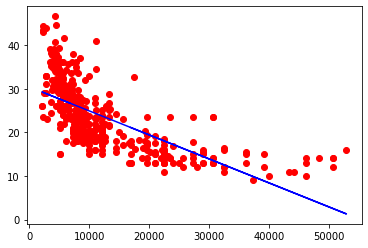

In [34]:
X2 = X**2
lm_car_2 = LinearRegression().fit(X2,Y)
%matplotlib inline
plt.plot(X2,Y,"ro")
plt.plot(X2, lm_car_2.predict(X2), "blue")

In [35]:
print("El modelo explica en un " + str(round(lm_car_2.score(X2,Y)*100,2)) + "% a la variable real")
SSD = sum((Y-lm_car_2.predict(X2))**2)
RSE = np.sqrt(SSD/len(X2)-1)
error = RSE/np.mean(Y)
print("Error del modelo: " + str(round(error*100,2)) + "%")

El modelo explica en un 48.5% a la variable real
Error del modelo: 23.2%


## Modelo de regresión lineal y cuadrático
* mpg = a + b * horsepower^2

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [37]:
poly = PolynomialFeatures(degree=2)

In [38]:
X_poly = poly.fit_transform(X)

In [39]:
lm_car_poly = linear_model.LinearRegression().fit(X_poly,Y)

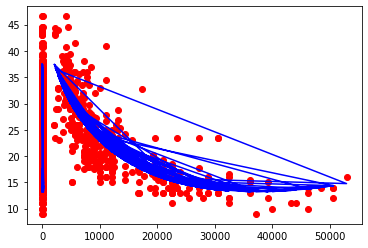

In [40]:
%matplotlib inline
plt.plot(X_poly,Y,"ro")
plt.plot(X_poly, lm_car_poly.predict(X_poly), "blue")

In [41]:
print("El modelo explica en un " + str(round(lm_car_poly.score(X_poly,Y)*100,2)) + "% a la variable real")
SSD = sum((Y-lm_car_poly.predict(X_poly))**2)
RSE = np.sqrt(SSD/len(X_poly)-1)
error = RSE/np.mean(Y)
print("Error del modelo: " + str(round(error*100,2)) + "%")

El modelo explica en un 64.39% a la variable real
Error del modelo: 19.15%


In [42]:
def regression_validation(lm, X, Y, d):
    print("Modelo polinomial de grado " + str(d))
    print("El modelo explica en un " + str(round(lm.score(X,Y)*100,2)) + "% a la variable real")
    SSD = sum((Y-lm.predict(X))**2)
    RSE = np.sqrt(SSD/len(X)-1)
    error = RSE/np.mean(Y)
    print("Error del modelo: " + str(round(error*100,2)) + "%")
    print("---------------------------------------------")

In [43]:
for d in range(2,7):
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    lm_car_poly = linear_model.LinearRegression().fit(X_poly,Y)
    regression_validation(lm_car_poly, X_poly, Y, d)

Modelo polinomial de grado 2
El modelo explica en un 64.39% a la variable real
Error del modelo: 19.15%
---------------------------------------------
Modelo polinomial de grado 3
El modelo explica en un 64.45% a la variable real
Error del modelo: 19.13%
---------------------------------------------
Modelo polinomial de grado 4
El modelo explica en un 64.68% a la variable real
Error del modelo: 19.07%
---------------------------------------------
Modelo polinomial de grado 5
El modelo explica en un 65.48% a la variable real
Error del modelo: 18.84%
---------------------------------------------
Modelo polinomial de grado 6
El modelo explica en un 65.73% a la variable real
Error del modelo: 18.77%
---------------------------------------------


## El problema de los outliers

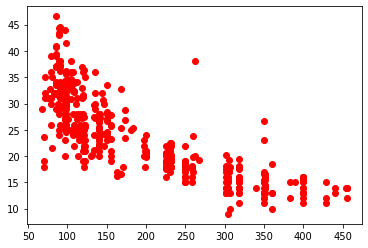

In [44]:
plt.plot(df_cars["displacement"], df_cars["mpg"], "ro")

In [45]:
X = df_cars["displacement"].fillna(df_cars["displacement"].mean())
X = pd.DataFrame(X)
Y = df_cars["mpg"].fillna(df_cars["mpg"].mean())

lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Factor de R cuadrado: 0.6261049762826918


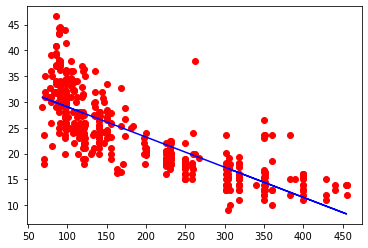

In [46]:
print("Factor de R cuadrado: " + str(lm.score(X,Y)))
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X, lm.predict(X), "blue")

In [48]:
df_filter = df_cars[(df_cars["displacement"]>250) & (df_cars["mpg"]>35)]

df_filter

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)
